<a href="https://colab.research.google.com/github/rania-alhabsyi/MachineLearningTasks/blob/main/Deep_Learning_Mid_Term_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aisyah Rania Al Habsyi

2206052805

Deep Learning Mid-Test

In [21]:
# Clone GitHub repository, install dependencies
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

# Import PyTorch
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/107.7 GB disk)


# Detect

detect.py run YOLOv5 inference on variety of sources, downloading models automatically from the latest YOLOv5 release, and saving results to runs/detect. Example inference sources:

In [22]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU

100% 14.1M/14.1M [00:00<00:00, 119MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/sort/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 440.4ms
image 2/2 /content/yolov5/sort/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 348.8ms
Speed: 6.6ms pre-process, 394.6ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


The downloaded file is saved on file yolov5/runs/deetect/exp

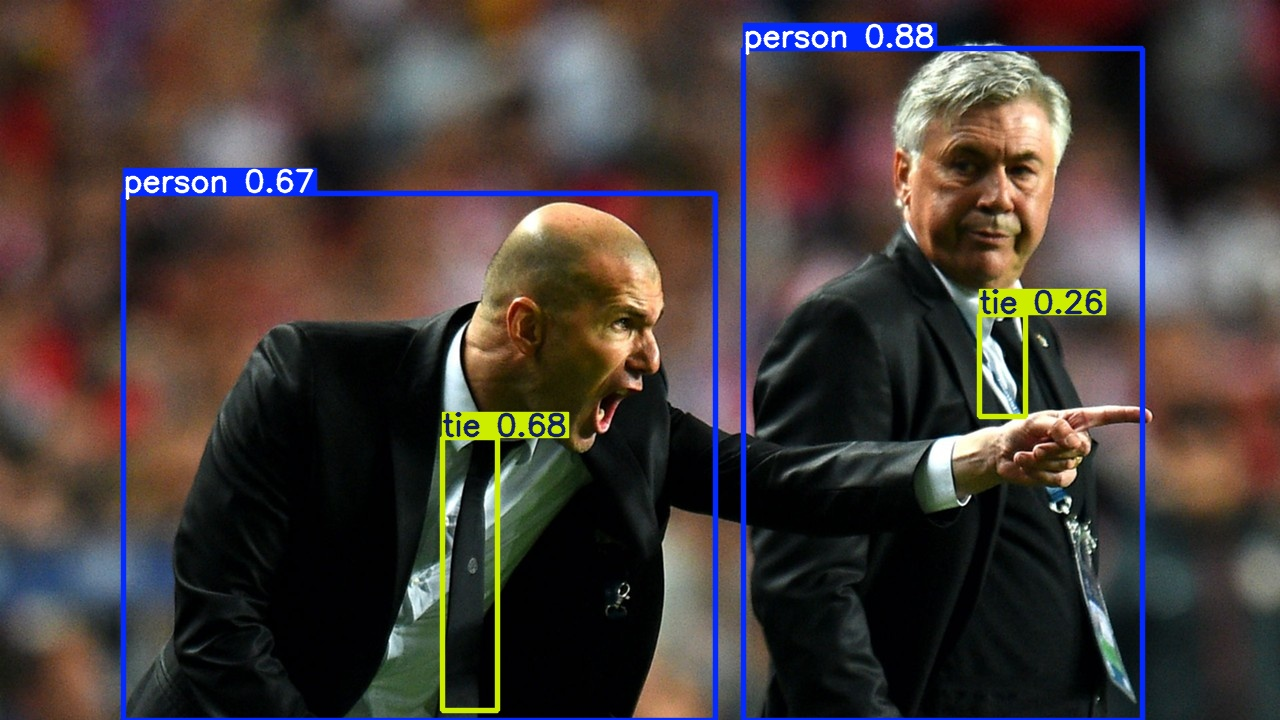

In [23]:
# Example
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches

img = cv2.imread('runs/detect/exp/zidane.jpg')
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

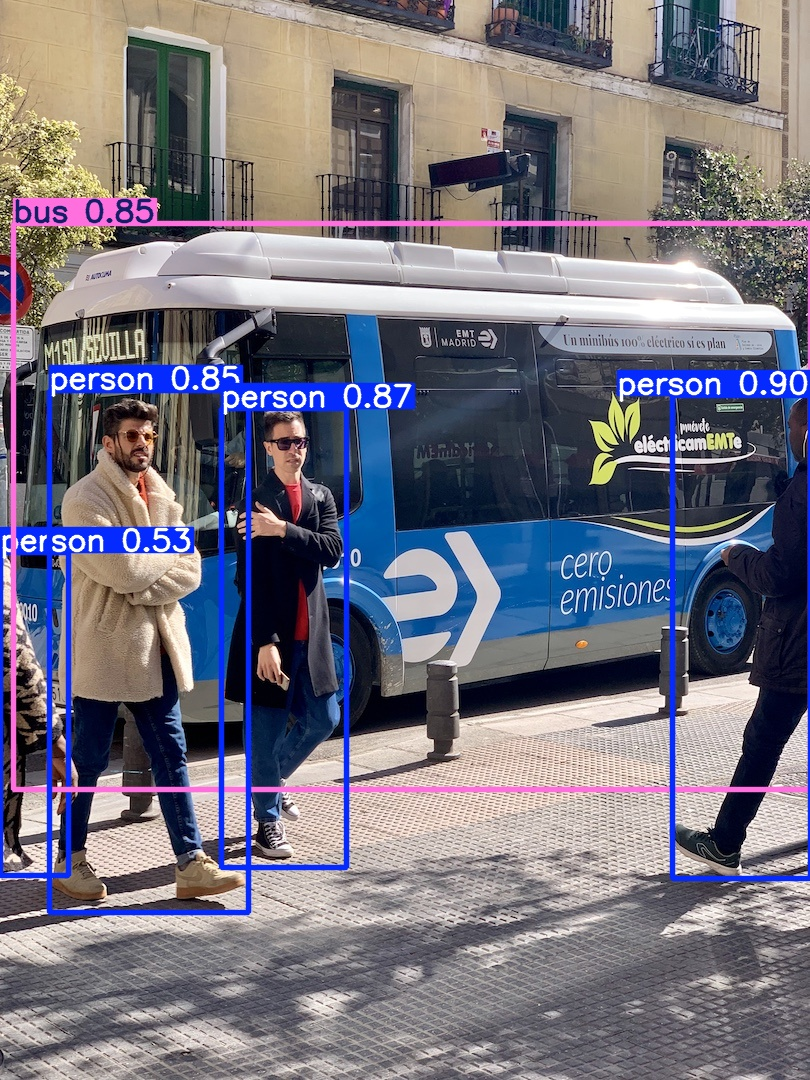

In [24]:
# Example
import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches

img = cv2.imread('runs/detect/exp/bus.jpg')
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

# YOLOv5 Implementation

Resources and outputs are stored here:

https://drive.google.com/drive/folders/1No55463Sf-W57Vi2ciAbmmfo9ETFpefN?usp=sharing

In [ ]:
import torch
import cv2
import pandas as pd
from datetime import datetime
import os
from google.colab.patches import cv2_imshow # Import cv2_imshow for displaying in Colab


# Load YOLOv5 model (using a larger model for better accuracy)
model = torch.hub.load('ultralytics/yolov5', 'yolov5m')  # Use yolov5m instead of yolov5s for better accuracy


cap = cv2.VideoCapture('/content/video_sample_road.mp4')


# Set higher resolution for better accuracy (if your webcam supports it)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)


# We Get the video writer initialized to save the output video
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
output_video_path = 'output.avi'
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'XVID'), 20.0, (frame_width, frame_height))


# Log file setup
log_file = 'detection_log.csv'
log_columns = ['Timestamp', 'Object', 'Confidence', 'Frame']
log_data = []


# Directory to save frames
frames_dir = 'detected_frames'
os.makedirs(frames_dir, exist_ok=True)


if not cap.isOpened():
  print("Error: Could not open video.")
  exit()


frame_count = 0
confidence_threshold = 0.5  # Increased confidence threshold for better accuracy


while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
      break


  # Perform object detection
  results = model(frame)

  # Get detection results
  # Move tensors to CPU before converting to NumPy arrays
  labels = results.xyxyn[0][:, -1].cpu().numpy()
  cords = results.xyxyn[0][:, :-1].cpu().numpy()

  # Annotate frame
  n = len(labels)
  for i in range(n):
      row = cords[i]
      if row[4] >= confidence_threshold:  # Apply the confidence threshold
          x1, y1, x2, y2 = int(row[0] * frame_width), int(row[1] * frame_height), int(row[2] * frame_width), int(row[3] * frame_height)
          bgr = (0, 255, 0)
          cv2.rectangle(frame, (x1, y1), (x2, y2), bgr, 2)
          text = f"{model.names[int(labels[i])]} {row[4]:.2f}"
          cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, bgr, 2)




          # Log detected objects
          timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
          log_data.append([timestamp, model.names[int(labels[i])], row[4], frame_count])


  # Save frame to video file
  out.write(frame)


  # # Display the frame
  # cv2_imshow(frame)


  # Press 'q' to quit or 's' to save the current frame
  key = cv2.waitKey(1) & 0xFF
  if key == ord('q'):
      break
  elif key == ord('s'):
      frame_path = os.path.join(frames_dir, f"frame_{frame_count}.jpg")
      cv2.imwrite(frame_path, frame)
      print(f"Frame {frame_count} saved at {frame_path}")


  frame_count += 1


# Release everything if the job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


# Save log data to CSV
log_df = pd.DataFrame(log_data, columns=log_columns)
log_df.to_csv(log_file, index=False)

print(f"Detection log saved to {log_file}")
print(f"Annotated video saved to {output_video_path}")
print(f"Detected frames saved to {frames_dir}")

Streaming output truncated to the last 5000 lines.
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/